In [1]:
from skimage.feature import blob_log
from skimage.io import imread
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import os, warnings
from sklearn.cluster import AffinityPropagation
from sklearn.neighbors import KDTree

In [2]:
from instapipeline import QuantiusAnnotation, SpotAnnotationAnalysis, util

In [3]:
clustering_params = ['AffinityPropagation', -350]

In [4]:
crop_filename = 'ISS_rnd0_ch3_z0_0.png'
crop_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/test/test_crops/ISS_rnd0_ch3_z0_blacked.png'
json_filepath = '/Users/jenny.vo-phamhi/Documents/FISH-annotation/test/anno/ISS_rnd0_ch3_z0.json'
 

In [5]:
json_filepath = 'BeadAnnotation_20180413.json'
crop_filename = 'beads_200pxroi.png'

In [6]:
qa = QuantiusAnnotation(json_filepath, crop_filename)
sa = SpotAnnotationAnalysis(qa)
anno_all = qa.df()

In [7]:
df = anno_all

click_properties = util.get_click_properties(df)
coords = click_properties[:, :2]

Here just a subset of all the clicks are pulled out to be used.

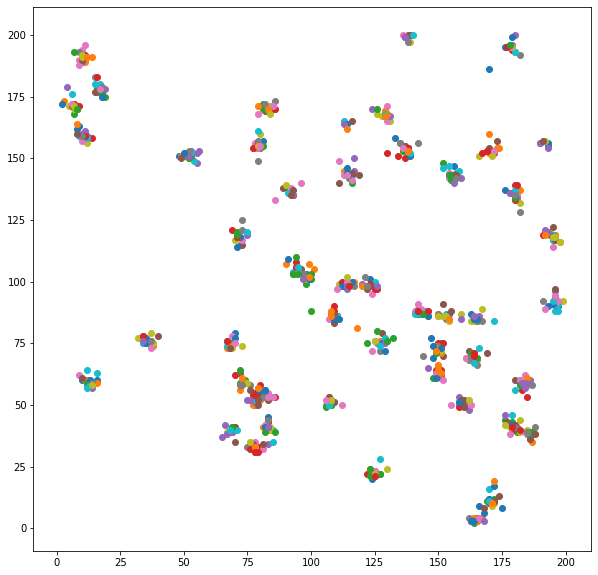

In [8]:
plt.figure(figsize=(10, 10))
coords_use = []

for x, y in coords:
    if x < 1000 and y < 1000:
        coords_use.append([x, y])
        plt.scatter(x, y)
plt.show()


In [9]:
af = AffinityPropagation(preference=-350).fit(coords_use)

In [10]:

cluster_centers_indices = af.cluster_centers_indices_
num_clusters = len(cluster_centers_indices)
cluster_members_lists = [[] for i in range(num_clusters)]
labels = af.labels_

for label_index, click_property in zip(labels, click_properties):
    cluster_members_lists[label_index].append(click_property)
    
cluster_centroids_list = []
    
for cluster_centers_index in cluster_centers_indices:
    cluster_centers = coords[cluster_centers_index]
    cluster_centroids_list.append(cluster_centers)

centroid_IDs = range(num_clusters)
column_names = ['centroid_x', 'centroid_y', 'members']
to_return = pd.DataFrame(index=centroid_IDs, columns=column_names)

for i in range(num_clusters):
    to_return['centroid_x'][i] = cluster_centroids_list[i][0]
    to_return['centroid_y'][i] = cluster_centroids_list[i][1]
    to_return['members'][i] = cluster_members_lists[i]

print(to_return)

   centroid_x centroid_y                                            members
0          72        118  [[72, 118, 2432, A2FZE7CARM54IG], [69, 121, 36...
1         171        153  [[171, 153, 1653, A2FZE7CARM54IG], [172, 152, ...
2         114         99  [[114, 99, 1511, A2FZE7CARM54IG], [114, 98, 26...
3          98        102  [[98, 102, 2511, A2FZE7CARM54IG], [98, 99, 399...
4          94        105  [[94, 105, 1451, A2FZE7CARM54IG], [94, 105, 10...
5          79         33  [[79, 33, 1127, A2FZE7CARM54IG], [75, 33, 960,...
6          69         39  [[69, 39, 1186, A2FZE7CARM54IG], [69, 39, 1692...
7          36         76  [[36, 76, 2612, A2FZE7CARM54IG], [37, 76, 1927...
8          13         60  [[13, 60, 2161, A2FZE7CARM54IG], [12, 60, 1389...
9          17        178  [[16, 177, 1193, A2FZE7CARM54IG], [18, 177, 98...
10         69         75  [[68, 74, 1949, A2FZE7CARM54IG], [68, 74, 1974...
11        172         12  [[172, 10, 4015, A2FZE7CARM54IG], [170, 11, 24...
12        11